In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Read data files
central = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'Central Region (2)')
east = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'East Region')
north_central = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'North Central')
north_coastal = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'North Costal')
north_inland = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'North Inland')
south = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'South Region')

# Set headers
central.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date', 'Diff']
east.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date', 'Diff']
north_central.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date', 'Diff']
north_coastal.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date', 'Diff']
north_inland.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date', 'Diff']
south.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date', 'Diff']

# Transform data to datetime format
central['Date'] = pd.to_datetime(central['Date'])
east['Date'] = pd.to_datetime(east['Date'])
north_central['Date'] = pd.to_datetime(north_central['Date'])
north_coastal['Date'] = pd.to_datetime(north_coastal['Date'])
north_inland['Date'] = pd.to_datetime(north_inland['Date'])
south['Date'] = pd.to_datetime(south['Date'])

In [3]:
# Susceptible, Exposed, Infected_Symptomatic, Infected_Asymptomatic, Recovered
init_pop = {
    'Central_High': [234144, 1, 1, 1, 0], # assuming the 1st E, I, A begin from Central region
    'Central_Low': [277516, 0, 0, 0, 0],
    'East_High': [249102, 0, 0, 0, 0],
    'East_Low': [239228, 0, 0, 0, 0],
    'North_Central_High': [175301, 0, 0, 0, 0],
    'North_Central_Low': [471079, 0, 0, 0, 0],
    'North_Coastal_High': [159507, 0, 0, 0, 0],
    'North_Coastal_Low': [375712, 0, 0, 0, 0],
    'North_Inland_High': [195235, 0, 0, 0, 0],
    'North_Inland_Low': [406765, 0, 0, 0, 0],
    'South_High': [212538, 0, 0, 0, 0],
    'South_Low': [287538, 0, 0, 0, 0]
}

In [4]:
# Extracting the initial conditions from above

# Central High Risk
S_H_C, E_H_C, I_H_C, A_H_C, R_H_C = init_pop['Central_High'][0],\
                                    init_pop['Central_High'][1],\
                                    init_pop['Central_High'][2],\
                                    init_pop['Central_High'][3],\
                                    init_pop['Central_High'][4]

# Central Low Risk
S_L_C, E_L_C, I_L_C, A_L_C, R_L_C = init_pop['Central_Low'][0],\
                                    init_pop['Central_Low'][1],\
                                    init_pop['Central_Low'][2],\
                                    init_pop['Central_Low'][3],\
                                    init_pop['Central_Low'][4]

# East High Risk
S_H_E, E_H_E, I_H_E, A_H_E, R_H_E = init_pop['East_High'][0],\
                                    init_pop['East_High'][1],\
                                    init_pop['East_High'][2],\
                                    init_pop['East_High'][3],\
                                    init_pop['East_High'][4]

# East Low Risk
S_L_E, E_L_E, I_L_E, A_L_E, R_L_E = init_pop['East_Low'][0],\
                                    init_pop['East_Low'][1],\
                                    init_pop['East_Low'][2],\
                                    init_pop['East_Low'][3],\
                                    init_pop['East_Low'][4]

# North Central High Risk
S_H_NCen, E_H_NCen, I_H_NCen, A_H_NCen, R_H_NCen = init_pop['North_Central_High'][0],\
                                                   init_pop['North_Central_High'][1],\
                                                   init_pop['North_Central_High'][2],\
                                                   init_pop['North_Central_High'][3],\
                                                   init_pop['North_Central_High'][4]

# North Central Low Risk
S_L_NCen, E_L_NCen, I_L_NCen, A_L_NCen, R_L_NCen =  init_pop['North_Central_Low'][0],\
                                                    init_pop['North_Central_Low'][1],\
                                                    init_pop['North_Central_Low'][2],\
                                                    init_pop['North_Central_Low'][3],\
                                                    init_pop['North_Central_Low'][4]

# North Coastal High Risk
S_H_NCoa, E_H_NCoa, I_H_NCoa, A_H_NCoa, R_H_NCoa =  init_pop['North_Coastal_High'][0],\
                                                    init_pop['North_Coastal_High'][1],\
                                                    init_pop['North_Coastal_High'][2],\
                                                    init_pop['North_Coastal_High'][3],\
                                                    init_pop['North_Coastal_High'][4]

# North Coastal Low Risk
S_L_NCoa, E_L_NCoa, I_L_NCoa, A_L_NCoa, R_L_NCoa =  init_pop['North_Coastal_Low'][0],\
                                                    init_pop['North_Coastal_Low'][1],\
                                                    init_pop['North_Coastal_Low'][2],\
                                                    init_pop['North_Coastal_Low'][3],\
                                                    init_pop['North_Coastal_Low'][4]

# North Inland High Risk
S_H_NI, E_H_NI, I_H_NI, A_H_NI, R_H_NI =  init_pop['North_Inland_High'][0],\
                                          init_pop['North_Inland_High'][1],\
                                          init_pop['North_Inland_High'][2],\
                                          init_pop['North_Inland_High'][3],\
                                          init_pop['North_Inland_High'][4]

# North Inland Low Risk
S_L_NI, E_L_NI, I_L_NI, A_L_NI, R_L_NI =  init_pop['North_Inland_Low'][0],\
                                          init_pop['North_Inland_Low'][1],\
                                          init_pop['North_Inland_Low'][2],\
                                          init_pop['North_Inland_Low'][3],\
                                          init_pop['North_Inland_Low'][4]

# South High Risk
S_H_S, E_H_S, I_H_S, A_H_S, R_H_S = init_pop['South_High'][0],\
                                    init_pop['South_High'][1],\
                                    init_pop['South_High'][2],\
                                    init_pop['South_High'][3],\
                                    init_pop['South_High'][4]

# South Low Risk
S_L_S, E_L_S, I_L_S, A_L_S, R_L_S = init_pop['South_Low'][0],\
                                    init_pop['South_Low'][1],\
                                    init_pop['South_Low'][2],\
                                    init_pop['South_Low'][3],\
                                    init_pop['South_Low'][4]

### Function for Discrete Stochastic SEIAR Model

In [5]:
# Assumed parameters -> modified based on the situation
param_dict = {
    'High': [0.4e-6, 0.2e-6, 1/5, 0.4, 1/14, 0.001],
    'Low': [0.4e-6, 0.2e-6, 1/5, 0.4, 1/14, 0.001],
}

gamma = param_dict['High'][2] # 1/gamma = incubation period (per day)
theta = param_dict['High'][3] # theta = proportion of showing symptoms (sympomatic rate) (per day)
lamb = param_dict['High'][4] # 1/lambda = infectious period (per day)
delta = param_dict['High'][5] # death rate (per day)

In [6]:
def SEIAR_model(S_H_C, E_H_C, I_H_C, A_H_C, R_H_C, S_L_C, E_L_C, I_L_C, A_L_C, R_L_C,\
               S_H_E, E_H_E, I_H_E, A_H_E, R_H_E, S_L_E, E_L_E, I_L_E, A_L_E, R_L_E,\
               S_H_NCen, E_H_NCen, I_H_NCen, A_H_NCen, R_H_NCen, S_L_NCen, E_L_NCen, I_L_NCen, A_L_NCen, R_L_NCen,\
               S_H_NCoa, E_H_NCoa, I_H_NCoa, A_H_NCoa, R_H_NCoa, S_L_NCoa, E_L_NCoa, I_L_NCoa, A_L_NCoa, R_L_NCoa,\
               S_H_NI, E_H_NI, I_H_NI, A_H_NI, R_H_NI, S_L_NI, E_L_NI, I_L_NI, A_L_NI, R_L_NI,\
               S_H_S, E_H_S, I_H_S, A_H_S, R_H_S, S_L_S, E_L_S, I_L_S, A_L_S, R_L_S, \
               beta_sym, beta_asym, gamma, theta, lamb, delta):
   
    '''
    Use the SEIAR model to predict the number of people in each compartment at each time step.
    The MC simulation estimates the mean of the number of people in each compartment at each time step.
    ------------------------------------------------------------------------------------------
    Input:
        Initial population in each compartment (line 1-6)
        beta_sym: transmission rate of symptomatic individuals -> to be calibrated
        beta_asym: transmission rate of asymptomatic individuals -> to be calibrated
        gamma: rate of recovery
        theta: rate of progression from exposed to infectious
        lamb: rate of progression from infectious to asymptomatic
        delta: rate of progression from asymptomatic to recovered
    
    Output:
        Populations for SEIAR from each region
    '''

    # Simulation length (in days)
    t = 214
    
    # Initialise arrays to store populations
    C_H = np.zeros((t+1, 6))
    C_L = np.zeros((t+1, 6))

    E_H = np.zeros((t+1, 6))
    E_L = np.zeros((t+1, 6))

    NCen_H = np.zeros((t+1, 6))
    NCen_L = np.zeros((t+1, 6))

    NCoa_H = np.zeros((t+1, 6))
    NCoa_L = np.zeros((t+1, 6))

    NI_H = np.zeros((t+1, 6))
    NI_L = np.zeros((t+1, 6))

    S_H = np.zeros((t+1, 6))
    S_L = np.zeros((t+1, 6))

    # Mobility rates from each region to each region -> refer to ./Data/Mobility.ipynb
    mob_central_arr = np.array([

        # central to east
        [2518.007912, 1179.226414, 2302.018371], \
        # central to north central
        [5431.723516, 1940.995073, 4336.156366], \
        # central to north coastal
        [410.088803, 224.745859, 654.88667], \
        # central to north inland
        [664.540636, 366.97859, 588.297201], \
        # central to south
        [3640.640873, 1626.007515, 2917.389471]

    ])

    mob_east_arr = np.array([

        # east to central
        [3768.837284, 1440.608412, 2866.137454], \
        # east to north central
        [5425.003638, 1919.445416, 4670.294659], \
        # east to north coastal
        [483.573126, 191.392576, 473.906442], \
        # east to north inland
        [1055.682996, 484.299215, 842.685923], \
        # east to south
        [2488.03862, 980.052445, 2087.730478]

    ])

    mob_north_central_arr = np.array([

        # north central to central
        [3657.897354, 1054.592602, 3087.41847], \
        # north central to east
        [2111.999373, 871.361025, 2093.514868], \
        # north central to north coastal
        [1656.53273, 460.539775, 1724.08199], \
        # north central to north inland
        [2767.349274, 983.942653, 2341.094009], \
        # north central to south
        [1257.405478, 596.794501, 1182.745383]

    ])

    mob_north_coastal_arr = np.array([

        # north coastal to central
        [780.166594, 156.644603, 1196.23607], \
        # north coastal to east
        [246.915804, 115.929512, 226.261725], \
        # north coastal to north central
        [2547.496323, 631.995693, 1936.045114], \
        # north coastal to north inland
        [3898.342286, 1414.099677, 3053.434645], \
        # north coastal to south
        [258.826212, 133.157868, 306.770863]

    ])

    mob_north_inland_arr = np.array([

        # north inland to central
        [1507.037202, 392.630209, 1305.236506], \
        # north inland to east
        [1000.642647, 390.292827, 879.488701], \
        # north inland to north central
        [6136.233626, 1687.503238, 4745.989662], \
        # north inland to north coastal
        [5256.002028, 1827.728619, 4981.44469], \
        # north inland to south
        [607.446061, 255.851188, 534.272639]

    ])

    mob_south_arr = np.array([

        # south to central
        [4053.532554, 1545.91116, 2984.388535], \
        # south to east
        [1970.762799, 828.927306, 1716.573243], \
        # south to north central
        [3883.18689, 1374.748533, 3361.535465], \
        # south to north coastal
        [391.417326, 147.78653, 331.027812], \
        # south to north inland
        [622.229053, 262.674827, 511.746844]

    ])

    # Divide by population to get % change
    mob_central_arr = mob_central_arr / 511660
    mob_east_arr = mob_east_arr / 488330
    mob_north_central_arr = mob_north_central_arr / 646380
    mob_north_coastal_arr = mob_north_coastal_arr / 535219
    mob_north_inland_arr = mob_north_inland_arr / 602000
    mob_south_arr = mob_south_arr / 500076

    # Mobility changes for 3 phases -> refer to ./Data/Mobility.ipynb
    for day in range(1, t-1):

        if day <= 70:
            # Here we take the average of the mobility rates for each region
            mob_central = np.average(mob_central_arr, axis=0)[0]
            mob_east = np.average(mob_east_arr, axis=0)[0]
            mob_north_central = np.average(mob_north_central_arr, axis=0)[0]
            mob_north_coastal = np.average(mob_north_coastal_arr, axis=0)[0]
            mob_north_inland = np.average(mob_north_inland_arr, axis=0)[0]
            mob_south = np.average(mob_south_arr, axis=0)[0]
           
        elif day > 70 and day < 80:
            # Same as above
            mob_central = np.average(mob_central_arr, axis=0)[1]
            mob_east = np.average(mob_east_arr, axis=0)[1]
            mob_north_central = np.average(mob_north_central_arr, axis=0)[1]
            mob_north_coastal = np.average(mob_north_coastal_arr, axis=0)[1]
            mob_north_inland = np.average(mob_north_inland_arr, axis=0)[1]
            mob_south = np.average(mob_south_arr, axis=0)[1]

        else:
            # Same as above
            mob_central = np.average(mob_central_arr, axis=0)[2]
            mob_east = np.average(mob_east_arr, axis=0)[2]
            mob_north_central = np.average(mob_north_central_arr, axis=0)[2]
            mob_north_coastal = np.average(mob_north_coastal_arr, axis=0)[2]
            mob_north_inland = np.average(mob_north_inland_arr, axis=0)[2]
            mob_south = np.average(mob_south_arr, axis=0)[2]

        
        # Compute Monte Carlo simulation using biniomial distribution
        # n = initial population, p = probability of event from the model
        Central_High = { 'S_to_E': np.random.binomial(S_H_C, (beta_sym * (I_H_C + I_L_C)) + (beta_asym * (A_H_C + A_L_C))),
                         'E_to_I': np.random.binomial(E_H_C, gamma*theta),
                         'E_to_A': np.random.binomial(E_H_C, gamma*(1-theta)),
                         'I_to_R': np.random.binomial(I_H_C, delta + lamb),
                         'A_to_R': np.random.binomial(A_H_C, delta) }

        Central_Low = { 'S_to_E': np.random.binomial(S_L_C, (beta_sym * (I_H_C + I_L_C)) + (beta_asym * (A_H_C + A_L_C))),
                        'E_to_I': np.random.binomial(E_L_C, gamma*theta),
                        'E_to_A': np.random.binomial(E_L_C, gamma*(1-theta)),
                        'I_to_R': np.random.binomial(I_L_C, delta + lamb),
                        'A_to_R': np.random.binomial(A_L_C, delta) }

        East_High = { 'S_to_E': np.random.binomial(S_H_E, (beta_sym * (I_H_E + I_L_E)) + (beta_asym * (A_H_E + A_L_E))),
                      'E_to_I': np.random.binomial(E_H_E, gamma*theta),
                      'E_to_A': np.random.binomial(E_H_E, gamma*(1-theta)),
                      'I_to_R': np.random.binomial(I_H_E, delta + lamb),
                      'A_to_R': np.random.binomial(A_H_E, delta) }

        East_Low = {    'S_to_E': np.random.binomial(S_L_E, (beta_sym * (I_H_E + I_L_E)) + (beta_asym * (A_H_E + A_L_E))),
                        'E_to_I': np.random.binomial(E_L_E, gamma*theta),
                        'E_to_A': np.random.binomial(E_L_E, gamma*(1-theta)),
                        'I_to_R': np.random.binomial(I_L_E, delta + lamb),
                        'A_to_R': np.random.binomial(A_L_E, delta) }
        
        North_Central_High = {  'S_to_E': np.random.binomial(S_H_NCen, (beta_sym * (I_H_NCen + I_L_NCen)) + (beta_asym * (A_H_NCen + A_L_NCen))),
                                'E_to_I': np.random.binomial(E_H_NCen, gamma*theta),
                                'E_to_A': np.random.binomial(E_H_NCen, gamma*(1-theta)),
                                'I_to_R': np.random.binomial(I_H_NCen, delta + lamb),
                                'A_to_R': np.random.binomial(A_H_NCen, delta) }
        
        North_Central_Low = {   'S_to_E': np.random.binomial(S_L_NCen, (beta_sym * (I_H_NCen + I_L_NCen) + (beta_asym * (A_H_NCen + A_L_NCen)))),
                                'E_to_I': np.random.binomial(E_L_NCen, gamma*theta),
                                'E_to_A': np.random.binomial(E_L_NCen, gamma*(1-theta)),
                                'I_to_R': np.random.binomial(I_L_NCen, delta + lamb),
                                'A_to_R': np.random.binomial(A_L_NCen, delta) }

        North_Coastal_High = {  'S_to_E': np.random.binomial(S_H_NCoa, (beta_sym * (I_H_NCoa + I_L_NCoa)) + (beta_asym * (A_H_NCoa + A_L_NCoa))),
                                'E_to_I': np.random.binomial(E_H_NCoa, gamma*theta),
                                'E_to_A': np.random.binomial(E_H_NCoa, gamma*(1-theta)),
                                'I_to_R': np.random.binomial(I_H_NCoa, delta + lamb),
                                'A_to_R': np.random.binomial(A_H_NCoa, delta) }
        
        North_Coastal_Low = {   'S_to_E': np.random.binomial(S_L_NCoa, (beta_sym * (I_H_NCoa + I_L_NCoa)) + (beta_asym * (A_H_NCoa + A_L_NCoa))),
                                'E_to_I': np.random.binomial(E_L_NCoa, gamma*theta),
                                'E_to_A': np.random.binomial(E_L_NCoa, gamma*(1-theta)),
                                'I_to_R': np.random.binomial(I_L_NCoa, delta + lamb),
                                'A_to_R': np.random.binomial(A_L_NCoa, delta) }
        
        North_Inland_High = {   'S_to_E': np.random.binomial(S_H_NI, (beta_sym * (I_H_NI + I_L_NI)) + (beta_asym * (A_H_NI + A_L_NI))),
                                'E_to_I': np.random.binomial(E_H_NI, gamma*theta),
                                'E_to_A': np.random.binomial(E_H_NI, gamma*(1-theta)),
                                'I_to_R': np.random.binomial(I_H_NI, delta + lamb),
                                'A_to_R': np.random.binomial(A_H_NI, delta) }

        North_Inland_Low = {    'S_to_E': np.random.binomial(S_L_NI, (beta_sym * (I_H_NI + I_L_NI)) + (beta_asym * (A_H_NI + A_L_NI))),
                                'E_to_I': np.random.binomial(E_L_NI, gamma*theta),
                                'E_to_A': np.random.binomial(E_L_NI, gamma*(1-theta)),
                                'I_to_R': np.random.binomial(I_L_NI, delta + lamb),
                                'A_to_R': np.random.binomial(A_L_NI, delta) }
        
        South_High = {  'S_to_E': np.random.binomial(S_H_S, (beta_sym * (I_H_S + I_L_S)) + (beta_asym * (A_H_S + A_L_S))),
                        'E_to_I': np.random.binomial(E_H_S, gamma*theta),
                        'E_to_A': np.random.binomial(E_H_S, gamma*(1-theta)),
                        'I_to_R': np.random.binomial(I_H_S, delta + lamb),
                        'A_to_R': np.random.binomial(A_H_S, delta) }

        South_Low = {   'S_to_E': np.random.binomial(S_L_S, (beta_sym * (I_H_S + I_L_S)) + (beta_asym * (A_H_S + A_L_S))),
                        'E_to_I': np.random.binomial(E_L_S, gamma*theta),
                        'E_to_A': np.random.binomial(E_L_S, gamma*(1-theta)),
                        'I_to_R': np.random.binomial(I_L_S, delta + lamb),
                        'A_to_R': np.random.binomial(A_L_S, delta) }
                                
        # Update populations for SEAIR
        # np.max is used to ensure that the population does not go negative
        Central_High_S_new = np.max(S_H_C - Central_High['S_to_E'] + \
            mob_central*(S_H_E + S_H_NCen + S_H_NCoa + S_H_NI + S_H_S) - 5 * mob_central * S_H_C, 0)
        Central_High_E_new = np.max(E_H_C + Central_High['S_to_E'] - Central_High['E_to_I'] - Central_High['E_to_A'] + \
            mob_central*(E_H_E + E_H_NCen + E_H_NCoa + E_H_NI + E_H_S) - 5 * mob_central * E_H_C, 0)
        Central_High_I_new = np.max(I_H_C + Central_High['E_to_I'] - Central_High['I_to_R'] + \
            mob_central*(I_H_E + I_H_NCen + I_H_NCoa + I_H_NI + I_H_S) - 5 * mob_central * I_H_C, 0)
        Central_High_A_new = np.max(A_H_C + Central_High['E_to_A'] - Central_High['A_to_R'] + \
            mob_central*(A_H_E + A_H_NCen + A_H_NCoa + A_H_NI + A_H_S) - 5 * mob_central * A_H_C, 0)
        Central_High_R_new = np.max(R_H_C + Central_High['I_to_R'] + Central_High['A_to_R'] + \
            mob_central*(R_H_E + R_H_NCen + R_H_NCoa + R_H_NI + R_H_S) - 5 * mob_central * R_H_C, 0)

        Central_Low_S_new = np.max(S_L_C - Central_Low['S_to_E'] + \
            mob_central*(S_L_E + S_L_NCen + S_L_NCoa + S_L_NI + S_H_S) - 5 * mob_central * S_L_C, 0)
        Central_Low_E_new = np.max(E_L_C + Central_Low['S_to_E'] - Central_Low['E_to_I'] - Central_Low['E_to_A'] + \
            mob_central*(E_L_E + E_L_NCen + E_L_NCoa + E_L_NI + E_L_S) - 5 * mob_central * E_L_C, 0)
        Central_Low_I_new = np.max(I_L_C + Central_Low['E_to_I'] - Central_Low['I_to_R'] + \
            mob_central*(I_L_E + I_L_NCen + I_L_NCoa + I_L_NI + I_L_S) - 5 * mob_central * I_L_C, 0)
        Central_Low_A_new = np.max(A_L_C + Central_Low['E_to_A'] - Central_Low['A_to_R'] + \
            mob_central*(A_L_E + A_L_NCen + A_L_NCoa + A_L_NI + A_L_S) - 5 * mob_central * A_L_C, 0)
        Central_Low_R_new = np.max(R_L_C + Central_Low['I_to_R'] + Central_Low['A_to_R'] + \
            mob_central*(R_L_E + R_L_NCen + R_L_NCoa + R_L_NI + R_L_S) - 5 * mob_central * R_L_C, 0)
        
        East_High_S_new = np.max(S_H_E - East_High['S_to_E'] + \
            mob_east*(S_H_C + S_H_NCen + S_H_NCoa + S_H_NI + S_H_S) - 5 * mob_east * S_H_E, 0)
        East_High_E_new = np.max(E_H_E + East_High['S_to_E'] - East_High['E_to_I'] - East_High['E_to_A'] + \
            mob_east*(E_H_C + E_H_NCen + E_H_NCoa + E_H_NI + E_H_S) - 5 * mob_east * E_H_E, 0)
        East_High_I_new = np.max(I_H_E + East_High['E_to_I'] - East_High['I_to_R'] + \
            mob_east*(I_H_C + I_H_NCen + I_H_NCoa + I_H_NI + I_H_S) - 5 * mob_east * I_H_E, 0)
        East_High_A_new = np.max(A_H_E + East_High['E_to_A'] - East_High['A_to_R'] + \
            mob_east*(A_H_C + A_H_NCen + A_H_NCoa + A_H_NI + A_H_S) - 5 * mob_east * A_H_E, 0)
        East_High_R_new = np.max(R_H_E + East_High['I_to_R'] + East_High['A_to_R'] + \
            mob_east*(R_H_C + R_H_NCen + R_H_NCoa + R_H_NI + R_H_S) - 5 * mob_east * R_H_E, 0)

        East_Low_S_new = np.max(S_L_E - East_Low['S_to_E'] + \
            mob_east*(S_L_C + S_L_NCen + S_L_NCoa + S_L_NI + S_L_S) - 5 * mob_east * S_L_E, 0)
        East_Low_E_new = np.max(E_L_E + East_Low['S_to_E'] - East_Low['E_to_I'] - East_Low['E_to_A'] + \
            mob_east*(E_L_C + E_L_NCen + E_L_NCoa + E_L_NI + E_L_S) - 5 * mob_east * E_L_E, 0)
        East_Low_I_new = np.max(I_L_E + East_Low['E_to_I'] - East_Low['I_to_R'] + \
            mob_east*(I_L_C + I_L_NCen + I_L_NCoa + I_L_NI + I_L_S) - 5 * mob_east * I_L_E, 0)
        East_Low_A_new = np.max(A_L_E + East_Low['E_to_A'] - East_Low['A_to_R'] + \
            mob_east*(A_L_C + A_L_NCen + A_L_NCoa + A_L_NI + A_L_S) - 5 * mob_east * A_L_E, 0)
        East_Low_R_new = np.max(R_L_E + East_Low['I_to_R'] + East_Low['A_to_R'] + \
            mob_east*(R_L_C + R_L_NCen + R_L_NCoa + R_L_NI + R_L_S) - 5 * mob_east * R_L_E, 0)
        
        North_Central_High_S_new = np.max(S_H_NCen - North_Central_High['S_to_E'] + \
            mob_north_central*(S_H_C + S_H_E + S_H_NCoa + S_H_NI + S_H_S) - 5 * mob_north_central * S_H_NCen, 0)
        North_Central_High_E_new = np.max(E_H_NCen + North_Central_High['S_to_E'] - North_Central_High['E_to_I'] - North_Central_High['E_to_A'] + \
            mob_north_central*(E_H_C + E_H_E + E_H_NCoa + E_H_NI + E_H_S) - 5 * mob_north_central * E_H_NCen, 0)
        North_Central_High_I_new = np.max(I_H_NCen + North_Central_High['E_to_I'] - North_Central_High['I_to_R'] + \
            mob_north_central*(I_H_C + I_H_E + I_H_NCoa + I_H_NI + I_H_S) - 5 * mob_north_central * I_H_NCen, 0)
        North_Central_High_A_new = np.max(A_H_NCen + North_Central_High['E_to_A'] - North_Central_High['A_to_R'] + \
            mob_north_central*(A_H_C + A_H_E + A_H_NCoa + A_H_NI + A_H_S) - 5 * mob_north_central * A_H_NCen, 0)
        North_Central_High_R_new = np.max(R_H_NCen + North_Central_High['I_to_R'] + North_Central_High['A_to_R'] + \
            mob_north_central*(R_H_C + R_H_E + R_H_NCoa + R_H_NI + R_H_S) - 5 * mob_north_central * R_H_NCen, 0)

        North_Central_Low_S_new = np.max(S_L_NCen - North_Central_Low['S_to_E'] + \
            mob_north_central*(S_L_C + S_L_E + S_L_NCoa + S_L_NI + S_L_S) - 5 * mob_north_central * S_L_NCen, 0)
        North_Central_Low_E_new = np.max(E_L_NCen + North_Central_Low['S_to_E'] - North_Central_Low['E_to_I'] - North_Central_Low['E_to_A'] + \
            mob_north_central*(E_L_C + E_L_E + E_L_NCoa + E_L_NI + E_L_S) - 5 * mob_north_central * E_L_NCen, 0)
        North_Central_Low_I_new = np.max(I_L_NCen + North_Central_Low['E_to_I'] - North_Central_Low['I_to_R'] + \
            mob_north_central*(I_L_C + I_L_E + I_L_NCoa + I_L_NI + I_L_S) - 5 * mob_north_central * I_L_NCen, 0)
        North_Central_Low_A_new = np.max(A_L_NCen + North_Central_Low['E_to_A'] - North_Central_Low['A_to_R'] + \
            mob_north_central*(A_L_C + A_L_E + A_L_NCoa + A_L_NI + A_L_S) - 5 * mob_north_central * A_L_NCen, 0)
        North_Central_Low_R_new = np.max(R_L_NCen + North_Central_Low['I_to_R'] + North_Central_Low['A_to_R'] + \
            mob_north_central*(R_L_C + R_L_E + R_L_NCoa + R_L_NI + R_L_S) - 5 * mob_north_central * R_L_NCen, 0)

        North_Coastal_High_S_new = np.max(S_H_NCoa - North_Coastal_High['S_to_E'] + \
            mob_north_coastal*(S_H_C + S_H_E + S_H_NCen + S_H_NI + S_H_S) - 5 * mob_north_coastal * S_H_NCoa, 0)
        North_Coastal_High_E_new = np.max(E_H_NCoa + North_Coastal_High['S_to_E'] - North_Coastal_High['E_to_I'] - North_Coastal_High['E_to_A'] + \
            mob_north_coastal*(E_H_C + E_H_E + E_H_NCen + E_H_NI + E_H_S) - 5 * mob_north_coastal * E_H_NCoa, 0)
        North_Coastal_High_I_new = np.max(I_H_NCoa + North_Coastal_High['E_to_I'] - North_Coastal_High['I_to_R'] + \
            mob_north_coastal*(I_H_C + I_H_E + I_H_NCen + I_H_NI + I_H_S) - 5 * mob_north_coastal * I_H_NCoa, 0)
        North_Coastal_High_A_new = np.max(A_H_NCoa + North_Coastal_High['E_to_A'] - North_Coastal_High['A_to_R'] + \
            mob_north_coastal*(A_H_C + A_H_E + A_H_NCen + A_H_NI + A_H_S) - 5 * mob_north_coastal * A_H_NCoa, 0)
        North_Coastal_High_R_new = np.max(R_H_NCoa + North_Coastal_High['I_to_R'] + North_Coastal_High['A_to_R'] + \
            mob_north_coastal*(R_H_C + R_H_E + R_H_NCen + R_H_NI + R_H_S) - 5 * mob_north_coastal * R_H_NCoa, 0)

        North_Coastal_Low_S_new = np.max(S_L_NCoa - North_Coastal_Low['S_to_E'] + \
            mob_north_coastal*(S_L_C + S_L_E + S_L_NCen + S_L_NI + S_L_S) - 5 * mob_north_coastal * S_L_NCoa, 0)
        North_Coastal_Low_E_new = np.max(E_L_NCoa + North_Coastal_Low['S_to_E'] - North_Coastal_Low['E_to_I'] - North_Coastal_Low['E_to_A'] + \
            mob_north_coastal*(E_L_C + E_L_E + E_L_NCen + E_L_NI + E_L_S) - 5 * mob_north_coastal * E_L_NCoa, 0)
        North_Coastal_Low_I_new = np.max(I_L_NCoa + North_Coastal_Low['E_to_I'] - North_Coastal_Low['I_to_R'] + \
            mob_north_coastal*(I_L_C + I_L_E + I_L_NCen + I_L_NI + I_L_S) - 5 * mob_north_coastal * I_L_NCoa, 0)
        North_Coastal_Low_A_new = np.max(A_L_NCoa + North_Coastal_Low['E_to_A'] - North_Coastal_Low['A_to_R'] + \
            mob_north_coastal*(A_L_C + A_L_E + A_L_NCen + A_L_NI + A_L_S) - 5 * mob_north_coastal * A_L_NCoa, 0)
        North_Coastal_Low_R_new = np.max(R_L_NCoa + North_Coastal_Low['I_to_R'] + North_Coastal_Low['A_to_R'] + \
            mob_north_coastal*(R_L_C + R_L_E + R_L_NCen + R_L_NI + R_L_S) - 5 * mob_north_coastal * R_L_NCoa, 0)

        North_Inland_High_S_new = np.max(S_H_NI - North_Inland_High['S_to_E'] + \
            mob_north_inland*(S_H_C + S_H_E + S_H_NCen + S_H_NCoa + S_H_S) - 5 * mob_north_inland * S_H_NI, 0)
        North_Inland_High_E_new = np.max(E_H_NI + North_Inland_High['S_to_E'] - North_Inland_High['E_to_I'] - North_Inland_High['E_to_A'] + \
            mob_north_inland*(E_H_C + E_H_E + E_H_NCen + E_H_NCoa + E_H_S) - 5 * mob_north_inland * E_H_NI, 0)
        North_Inland_High_I_new = np.max(I_H_NI + North_Inland_High['E_to_I'] - North_Inland_High['I_to_R'] + \
            mob_north_inland*(I_H_C + I_H_E + I_H_NCen + I_H_NCoa + I_H_S) - 5 * mob_north_inland * I_H_NI, 0)
        North_Inland_High_A_new = np.max(A_H_NI + North_Inland_High['E_to_A'] - North_Inland_High['A_to_R'] + \
            mob_north_inland*(A_H_C + A_H_E + A_H_NCen + A_H_NCoa + A_H_S) - 5 * mob_north_inland * A_H_NI, 0)
        North_Inland_High_R_new = np.max(R_H_NI + North_Inland_High['I_to_R'] + North_Inland_High['A_to_R'] + \
            mob_north_inland*(R_H_C + R_H_E + R_H_NCen + R_H_NCoa + R_H_S) - 5 * mob_north_inland * R_H_NI, 0)

        North_Inland_Low_S_new = np.max(S_L_NI - North_Inland_Low['S_to_E'] + \
            mob_north_inland*(S_L_C + S_L_E + S_L_NCen + S_L_NCoa + S_L_S) - 5 * mob_north_inland * S_L_NI, 0)
        North_Inland_Low_E_new = np.max(E_L_NI + North_Inland_Low['S_to_E'] - North_Inland_Low['E_to_I'] - North_Inland_Low['E_to_A'] + \
            mob_north_inland*(E_L_C + E_L_E + E_L_NCen + E_L_NCoa + E_L_S) - 5 * mob_north_inland * E_L_NI, 0)
        North_Inland_Low_I_new = np.max(I_L_NI + North_Inland_Low['E_to_I'] - North_Inland_Low['I_to_R'] + \
            mob_north_inland*(I_L_C + I_L_E + I_L_NCen + I_L_NCoa + I_L_S) - 5 * mob_north_inland * I_L_NI, 0)
        North_Inland_Low_A_new = np.max(A_L_NI + North_Inland_Low['E_to_A'] - North_Inland_Low['A_to_R'] + \
            mob_north_inland*(A_L_C + A_L_E + A_L_NCen + A_L_NCoa + A_L_S) - 5 * mob_north_inland * A_L_NI, 0)
        North_Inland_Low_R_new = np.max(R_L_NI + North_Inland_Low['I_to_R'] + North_Inland_Low['A_to_R'] + \
            mob_north_inland*(R_L_C + R_L_E + R_L_NCen + R_L_NCoa + R_L_S) - 5 * mob_north_inland * R_L_NI, 0)

        South_High_S_new = np.max(S_H_S - South_High['S_to_E'] + \
            mob_south*(S_H_C + S_H_E + S_H_NCen + S_H_NCoa + S_H_NI) - 5 * mob_south * S_H_S, 0)
        South_High_E_new = np.max(E_H_S + South_High['S_to_E'] - South_High['E_to_I'] - South_High['E_to_A'] + \
            mob_south*(E_H_C + E_H_E + E_H_NCen + E_H_NCoa + E_H_NI) - 5 * mob_south * E_H_S, 0)
        South_High_I_new = np.max(I_H_S + South_High['E_to_I'] - South_High['I_to_R'] + \
            mob_south*(I_H_C + I_H_E + I_H_NCen + I_H_NCoa + I_H_NI) - 5 * mob_south * I_H_S, 0)
        South_High_A_new = np.max(A_H_S + South_High['E_to_A'] - South_High['A_to_R'] + \
            mob_south*(A_H_C + A_H_E + A_H_NCen + A_H_NCoa + A_H_NI) - 5 * mob_south * A_H_S, 0)
        South_High_R_new = np.max(R_H_S + South_High['I_to_R'] + South_High['A_to_R'] + \
            mob_south*(R_H_C + R_H_E + R_H_NCen + R_H_NCoa + R_H_NI) - 5 * mob_south * R_H_S, 0)

        South_Low_S_new = np.max(S_L_S - South_Low['S_to_E'] + \
            mob_south*(S_L_C + S_L_E + S_L_NCen + S_L_NCoa + S_L_NI) - 5 * mob_south * S_L_S, 0)
        South_Low_E_new = np.max(E_L_S + South_Low['S_to_E'] - South_Low['E_to_I'] - South_Low['E_to_A'] + \
            mob_south*(E_L_C + E_L_E + E_L_NCen + E_L_NCoa + E_L_NI) - 5 * mob_south * E_L_S, 0)
        South_Low_I_new = np.max(I_L_S + South_Low['E_to_I'] - South_Low['I_to_R'] + \
            mob_south*(I_L_C + I_L_E + I_L_NCen + I_L_NCoa + I_L_NI) - 5 * mob_south * I_L_S, 0)
        South_Low_A_new = np.max(A_L_S + South_Low['E_to_A'] - South_Low['A_to_R'] + \
            mob_south*(A_L_C + A_L_E + A_L_NCen + A_L_NCoa + A_L_NI) - 5 * mob_south * A_L_S, 0)
        South_Low_R_new = np.max(R_L_S + South_Low['I_to_R'] + South_Low['A_to_R'] + \
            mob_south*(R_L_C + R_L_E + R_L_NCen + R_L_NCoa + R_L_NI) - 5 * mob_south * R_L_S, 0)

        # Store the values for the current loop
        C_H[day][0], C_H[day][1], C_H[day][2], C_H[day][3], C_H[day][4], C_H[day][5] =  S_H_C, E_H_C, I_H_C, A_H_C, R_H_C, mob_central
        C_L[day][0], C_L[day][1], C_L[day][2], C_L[day][3], C_L[day][4], C_L[day][5] =  S_L_C, E_L_C, I_L_C, A_L_C, R_L_C, mob_central

        E_H[day][0], E_H[day][1], E_H[day][2], E_H[day][3], E_H[day][4], E_H[day][5] =  S_H_E, E_H_E, I_H_E, A_H_E, R_H_E, mob_east
        E_L[day][0], E_L[day][1], E_L[day][2], E_L[day][3], E_L[day][4], E_L[day][5] =  S_L_E, E_L_E, I_L_E, A_L_E, R_L_E, mob_east

        NCen_H[day][0], NCen_H[day][1], NCen_H[day][2], NCen_H[day][3], NCen_H[day][4], NCen_H[day][5] =  S_H_NCen, E_H_NCen, I_H_NCen, A_H_NCen, R_H_NCen, mob_north_central
        NCen_L[day][0], NCen_L[day][1], NCen_L[day][2], NCen_L[day][3], NCen_L[day][4], NCen_L[day][5] =  S_L_NCen, E_L_NCen, I_L_NCen, A_L_NCen, R_L_NCen, mob_north_central

        NCoa_H[day][0], NCoa_H[day][1], NCoa_H[day][2], NCoa_H[day][3], NCoa_H[day][4], NCoa_H[day][5] =  S_H_NCoa, E_H_NCoa, I_H_NCoa, A_H_NCoa, R_H_NCoa, mob_north_coastal
        NCoa_L[day][0], NCoa_L[day][1], NCoa_L[day][2], NCoa_L[day][3], NCoa_L[day][4], NCoa_L[day][5] =  S_L_NCoa, E_L_NCoa, I_L_NCoa, A_L_NCoa, R_L_NCoa, mob_north_coastal

        NI_H[day][0], NI_H[day][1], NI_H[day][2], NI_H[day][3], NI_H[day][4], NI_H[day][5] =  S_H_NI, E_H_NI, I_H_NI, A_H_NI, R_H_NI, mob_north_inland
        NI_L[day][0], NI_L[day][1], NI_L[day][2], NI_L[day][3], NI_L[day][4], NI_L[day][5] =  S_L_NI, E_L_NI, I_L_NI, A_L_NI, R_L_NI, mob_north_inland
        
        S_H[day][0], S_H[day][1], S_H[day][2], S_H[day][3], S_H[day][4], S_H[day][5] =  S_H_S, E_H_S, I_H_S, A_H_S, R_H_S, mob_south
        S_L[day][0], S_L[day][1], S_L[day][2], S_L[day][3], S_L[day][4], S_L[day][5] =  S_L_S, E_L_S, I_L_S, A_L_S, R_L_S, mob_south

        # Update values for next compuation
        # Here used ceil method to avoid decimal values
        S_H_C, E_H_C, I_H_C, A_H_C, R_H_C = np.ceil(Central_High_S_new), np.ceil(Central_High_E_new), np.ceil(Central_High_I_new), np.ceil(Central_High_A_new), np.ceil(Central_High_R_new)
        S_L_C, E_L_C, I_L_C, A_L_C, R_L_C = np.ceil(Central_Low_S_new), np.ceil(Central_Low_E_new), np.ceil(Central_Low_I_new), np.ceil(Central_Low_A_new), np.ceil(Central_Low_R_new)

        S_H_E, E_H_E, I_H_E, A_H_E, R_H_E = np.ceil(East_High_S_new), np.ceil(East_High_E_new), np.ceil(East_High_I_new), np.ceil(East_High_A_new), np.ceil(East_High_R_new)
        S_L_E, E_L_E, I_L_E, A_L_E, R_L_E = np.ceil(East_Low_S_new), np.ceil(East_Low_E_new), np.ceil(East_Low_I_new), np.ceil(East_Low_A_new), np.ceil(East_Low_R_new)

        S_H_NCen, E_H_NCen, I_H_NCen, A_H_NCen, R_H_NCen = np.ceil(North_Central_High_S_new), np.ceil(North_Central_High_E_new), np.ceil(North_Central_High_I_new), np.ceil(North_Central_High_A_new), np.ceil(North_Central_High_R_new)
        S_L_NCen, E_L_NCen, I_L_NCen, A_L_NCen, R_L_NCen = np.ceil(North_Central_Low_S_new), np.ceil(North_Central_Low_E_new), np.ceil(North_Central_Low_I_new), np.ceil(North_Central_Low_A_new), np.ceil(North_Central_Low_R_new)

        S_H_NCoa, E_H_NCoa, I_H_NCoa, A_H_NCoa, R_H_NCoa = np.ceil(North_Coastal_High_S_new), np.ceil(North_Coastal_High_E_new), np.ceil(North_Coastal_High_I_new), np.ceil(North_Coastal_High_A_new), np.ceil(North_Coastal_High_R_new)
        S_L_NCoa, E_L_NCoa, I_L_NCoa, A_L_NCoa, R_L_NCoa = np.ceil(North_Coastal_Low_S_new), np.ceil(North_Coastal_Low_E_new), np.ceil(North_Coastal_Low_I_new), np.ceil(North_Coastal_Low_A_new), np.ceil(North_Coastal_Low_R_new)

        S_H_NI, E_H_NI, I_H_NI, A_H_NI, R_H_NI = np.ceil(North_Inland_High_S_new), np.ceil(North_Inland_High_E_new), np.ceil(North_Inland_High_I_new), np.ceil(North_Inland_High_A_new), np.ceil(North_Inland_High_R_new)
        S_L_NI, E_L_NI, I_L_NI, A_L_NI, R_L_NI = np.ceil(North_Inland_Low_S_new), np.ceil(North_Inland_Low_E_new), np.ceil(North_Inland_Low_I_new), np.ceil(North_Inland_Low_A_new), np.ceil(North_Inland_Low_R_new)

        S_H_S, E_H_S, I_H_S, A_H_S, R_H_S = np.ceil(South_High_S_new), np.ceil(South_High_E_new), np.ceil(South_High_I_new), np.ceil(South_High_A_new), np.ceil(South_High_R_new)
        S_L_S, E_L_S, I_L_S, A_L_S, R_L_S = np.ceil(South_Low_S_new), np.ceil(South_Low_E_new), np.ceil(South_Low_I_new), np.ceil(South_Low_A_new), np.ceil(South_Low_R_new)


    # return dictionaries of all the values in each compartment
    return C_H, C_L, E_H, E_L, NCen_H, NCen_L, NCoa_H, NCoa_L, NI_H, NI_L, S_H, S_L


### Function to simulate the Monte Carlo simulation

In [7]:
# Initialize DFs to store values
result_Central_High_v1 = { 'Mobility': [], 'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_Central_Low_v1 = { 'Mobility': [], 'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_East_High_v1 = { 'Mobility': [], 'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_East_Low_v1 = { 'Mobility': [], 'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_North_Central_High_v1 = { 'Mobility': [], 'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_North_Central_Low_v1 = { 'Mobility': [], 'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_North_Coastal_High_v1 = { 'Mobility': [], 'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_North_Coastal_Low_v1 = { 'Mobility': [], 'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_North_Inland_High_v1 = { 'Mobility': [], 'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_North_Inland_Low_v1 = { 'Mobility': [], 'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_South_High_v1 = { 'Mobility': [], 'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_South_Low_v1 = { 'Mobility': [], 'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }

result_Central_High_v2 = { 'Mobility': [], 'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_Central_Low_v2 = { 'Mobility': [], 'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_East_High_v2 = { 'Mobility': [], 'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_East_Low_v2 = { 'Mobility': [], 'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_North_Central_High_v2 = { 'Mobility': [], 'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_North_Central_Low_v2 = { 'Mobility': [], 'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_North_Coastal_High_v2 = { 'Mobility': [], 'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_North_Coastal_Low_v2 = { 'Mobility': [], 'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_North_Inland_High_v2 = { 'Mobility': [], 'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_North_Inland_Low_v2 = { 'Mobility': [], 'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_South_High_v2 = { 'Mobility': [], 'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_South_Low_v2 = { 'Mobility': [], 'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }

In [8]:
def MC_SEIAR(low_b, up_b):


    '''
    Simply run the SEIAR model for a range of beta values and store the results in a dictionary generated above.
    ----------------------------------------------------------------------------------------------------------------
    Input:
        low_b: lower bound of beta values
        up_b: upper bound of beta values

    Output:
        None -> results stored in the dictionary generated above
    '''
    
    # Initialise the counter for successful runs and failed runs
    count_1 = 0
    count_2 = 0
    total_count = 0

    # Run the model for a range of beta values
    for beta_symp in np.arange(low_b, up_b, 0.1e-07):
        for beta_asymp in np.arange(low_b, up_b, 0.1e-07):

            total_count += 1

            # Set the condition here if it is a successful run
            try:

                Central_High, Central_Low, East_High, East_Low, NCen_High, NCen_Low, NCoa_High, NCoa_Low, NI_High, NI_Low, South_High, South_Low = \
                SEIAR_model(S_H_C, E_H_C, I_H_C, A_H_C, R_H_C, S_L_C, E_L_C, I_L_C, A_L_C, R_L_C,\
                            S_H_E, E_H_E, I_H_E, A_H_E, R_H_E, S_L_E, E_L_E, I_L_E, A_L_E, R_L_E,\
                            S_H_NCen, E_H_NCen, I_H_NCen, A_H_NCen, R_H_NCen, S_L_NCen, E_L_NCen, I_L_NCen, A_L_NCen, R_L_NCen,\
                            S_H_NCoa, E_H_NCoa, I_H_NCoa, A_H_NCoa, R_H_NCoa, S_L_NCoa, E_L_NCoa, I_L_NCoa, A_L_NCoa, R_L_NCoa,\
                            S_H_NI, E_H_NI, I_H_NI, A_H_NI, R_H_NI, S_L_NI, E_L_NI, I_L_NI, A_L_NI, R_L_NI,\
                            S_H_S, E_H_S, I_H_S, A_H_S, R_H_S, S_L_S, E_L_S, I_L_S, A_L_S, R_L_S, \
                            beta_symp, beta_asymp, gamma, theta, lamb, delta) 
                            # mob_central, mob_east, mob_north_central, mob_north_coastal, mob_north_inland, mob_south, all from xx to xx

                # Store the results in the dictionary
                result_Central_High_v1['Mobility'].append(Central_High[:,5])
                result_Central_High_v1['Beta Symptomatic'].append(beta_symp)
                result_Central_High_v1['Beta Asymptomatic'].append(beta_asymp)
                result_Central_High_v1['S'].append(Central_High[:,0])
                result_Central_High_v1['E'].append(Central_High[:,1])
                result_Central_High_v1['I'].append(Central_High[:,2])
                result_Central_High_v1['A'].append(Central_High[:,3])
                result_Central_High_v1['R'].append(Central_High[:,4])

                result_Central_Low_v1['Mobility'].append(Central_Low[:,5])
                result_Central_Low_v1['Beta Symptomatic'].append(beta_symp)
                result_Central_Low_v1['Beta Asymptomatic'].append(beta_asymp)
                result_Central_Low_v1['S'].append(Central_Low[:,0])
                result_Central_Low_v1['E'].append(Central_Low[:,1])
                result_Central_Low_v1['I'].append(Central_Low[:,2])
                result_Central_Low_v1['A'].append(Central_Low[:,3])
                result_Central_Low_v1['R'].append(Central_Low[:,4])

                result_East_High_v1['Mobility'].append(East_High[:,5])
                result_East_High_v1['Beta Symptomatic'].append(beta_symp)
                result_East_High_v1['Beta Asymptomatic'].append(beta_asymp)
                result_East_High_v1['S'].append(East_High[:,0])
                result_East_High_v1['E'].append(East_High[:,1])
                result_East_High_v1['I'].append(East_High[:,2])
                result_East_High_v1['A'].append(East_High[:,3])
                result_East_High_v1['R'].append(East_High[:,4])

                result_East_Low_v1['Mobility'].append(East_Low[:,5])
                result_East_Low_v1['Beta Symptomatic'].append(beta_symp)
                result_East_Low_v1['Beta Asymptomatic'].append(beta_asymp)
                result_East_Low_v1['S'].append(East_Low[:,0])
                result_East_Low_v1['E'].append(East_Low[:,1])
                result_East_Low_v1['I'].append(East_Low[:,2])
                result_East_Low_v1['A'].append(East_Low[:,3])
                result_East_Low_v1['R'].append(East_Low[:,4])

                result_North_Central_High_v1['Mobility'].append(NCen_High[:,5])
                result_North_Central_High_v1['Beta Symptomatic'].append(beta_symp)
                result_North_Central_High_v1['Beta Asymptomatic'].append(beta_asymp)
                result_North_Central_High_v1['S'].append(NCen_High[:,0])
                result_North_Central_High_v1['E'].append(NCen_High[:,1])
                result_North_Central_High_v1['I'].append(NCen_High[:,2])
                result_North_Central_High_v1['A'].append(NCen_High[:,3])
                result_North_Central_High_v1['R'].append(NCen_High[:,4])

                result_North_Central_Low_v1['Mobility'].append(NCen_Low[:,5])
                result_North_Central_Low_v1['Beta Symptomatic'].append(beta_symp)
                result_North_Central_Low_v1['Beta Asymptomatic'].append(beta_asymp)
                result_North_Central_Low_v1['S'].append(NCen_Low[:,0])
                result_North_Central_Low_v1['E'].append(NCen_Low[:,1])
                result_North_Central_Low_v1['I'].append(NCen_Low[:,2])
                result_North_Central_Low_v1['A'].append(NCen_Low[:,3])
                result_North_Central_Low_v1['R'].append(NCen_Low[:,4])

                result_North_Coastal_High_v1['Mobility'].append(NCoa_High[:,5])
                result_North_Coastal_High_v1['Beta Symptomatic'].append(beta_symp)
                result_North_Coastal_High_v1['Beta Asymptomatic'].append(beta_asymp)
                result_North_Coastal_High_v1['S'].append(NCoa_High[:,0])
                result_North_Coastal_High_v1['E'].append(NCoa_High[:,1])
                result_North_Coastal_High_v1['I'].append(NCoa_High[:,2])
                result_North_Coastal_High_v1['A'].append(NCoa_High[:,3])
                result_North_Coastal_High_v1['R'].append(NCoa_High[:,4])

                result_North_Coastal_Low_v1['Mobility'].append(NCoa_Low[:,5])
                result_North_Coastal_Low_v1['Beta Symptomatic'].append(beta_symp)
                result_North_Coastal_Low_v1['Beta Asymptomatic'].append(beta_asymp)
                result_North_Coastal_Low_v1['S'].append(NCoa_Low[:,0])
                result_North_Coastal_Low_v1['E'].append(NCoa_Low[:,1])
                result_North_Coastal_Low_v1['I'].append(NCoa_Low[:,2])
                result_North_Coastal_Low_v1['A'].append(NCoa_Low[:,3])
                result_North_Coastal_Low_v1['R'].append(NCoa_Low[:,4])

                result_North_Inland_High_v1['Mobility'].append(NI_High[:,5])
                result_North_Inland_High_v1['Beta Symptomatic'].append(beta_symp)
                result_North_Inland_High_v1['Beta Asymptomatic'].append(beta_asymp)
                result_North_Inland_High_v1['S'].append(NI_High[:,0])
                result_North_Inland_High_v1['E'].append(NI_High[:,1])
                result_North_Inland_High_v1['I'].append(NI_High[:,2])
                result_North_Inland_High_v1['A'].append(NI_High[:,3])
                result_North_Inland_High_v1['R'].append(NI_High[:,4])

                result_North_Inland_Low_v1['Mobility'].append(NI_Low[:,5])
                result_North_Inland_Low_v1['Beta Symptomatic'].append(beta_symp)
                result_North_Inland_Low_v1['Beta Asymptomatic'].append(beta_asymp)
                result_North_Inland_Low_v1['S'].append(NI_Low[:,0])
                result_North_Inland_Low_v1['E'].append(NI_Low[:,1])
                result_North_Inland_Low_v1['I'].append(NI_Low[:,2])
                result_North_Inland_Low_v1['A'].append(NI_Low[:,3])
                result_North_Inland_Low_v1['R'].append(NI_Low[:,4])

                result_South_High_v1['Mobility'].append(South_High[:,5])
                result_South_High_v1['Beta Symptomatic'].append(beta_symp)
                result_South_High_v1['Beta Asymptomatic'].append(beta_asymp)
                result_South_High_v1['S'].append(South_High[:,0])
                result_South_High_v1['E'].append(South_High[:,1])
                result_South_High_v1['I'].append(South_High[:,2])
                result_South_High_v1['A'].append(South_High[:,3])
                result_South_High_v1['R'].append(South_High[:,4])

                result_South_Low_v1['Mobility'].append(South_Low[:,5])
                result_South_Low_v1['Beta Symptomatic'].append(beta_symp)
                result_South_Low_v1['Beta Asymptomatic'].append(beta_asymp)
                result_South_Low_v1['S'].append(South_Low[:,0])
                result_South_Low_v1['E'].append(South_Low[:,1])
                result_South_Low_v1['I'].append(South_Low[:,2])
                result_South_Low_v1['A'].append(South_Low[:,3])
                result_South_Low_v1['R'].append(South_Low[:,4])

                # If the simulation is successful, the number of success increases by 1
                count_1 += 1

            # Othereise, if the simulation failed, nothing happens      
            except:

                # If the simulation is failed, the number of failure increases by 1
                count_2 += 1
                

    print('Success', count_1, 'times')
    print('Failed', count_2, 'times')
    print('Total Count', total_count, 'times')


### Compute MC_SEIAR

In [9]:
MC_SEIAR(1.0e-10, 1.0e-08)

Success 0 times
Failed 1 times
Total Count 1 times


In [10]:
MC_SEIAR(1.0e-08, 1.0e-07)

Success 46 times
Failed 35 times
Total Count 81 times


In [11]:
MC_SEIAR(1.0e-07, 1.0e-06)

Success 6498 times
Failed 1602 times
Total Count 8100 times


In [12]:
MC_SEIAR(1.0e-06, 0.5e-05)

Success 25724 times
Failed 135077 times
Total Count 160801 times


In [13]:
MC_SEIAR(0.5e-05, 0.8e-05)

Success 0 times
Failed 90000 times
Total Count 90000 times


In [14]:
MC_SEIAR(0.8e-05, 0.9e-05)

Success 0 times
Failed 10201 times
Total Count 10201 times


In [15]:
MC_SEIAR(0.9e-05, 0.95e-05)

Success 0 times
Failed 2601 times
Total Count 2601 times


In [16]:
# MC_SEIAR(0.95e-05, 1.0e-04)

### Compute the LSQS

In [17]:
# Convert dictionary to PD dataframe
central_high_v1 = pd.DataFrame(result_Central_High_v1)
east_high_v1 = pd.DataFrame(result_East_High_v1)
north_central_high_v1 = pd.DataFrame(result_North_Central_High_v1)
north_coastal_high_v1 = pd.DataFrame(result_North_Coastal_High_v1)
north_inland_high_v1 = pd.DataFrame(result_North_Inland_High_v1)
south_high_v1 = pd.DataFrame(result_South_High_v1)

In [18]:
# Add computed cases to the dataframe
central_high_v1['Cases'] = central_high_v1['I']
east_high_v1['Cases'] = east_high_v1['I']
north_central_high_v1['Cases'] = north_central_high_v1['I']
north_coastal_high_v1['Cases'] = north_coastal_high_v1['I']
north_inland_high_v1['Cases'] = north_inland_high_v1['I']
south_high_v1['Cases'] = south_high_v1['I']

In [19]:
central_low_v1 = pd.DataFrame(result_Central_Low_v1)
east_low_v1 = pd.DataFrame(result_East_Low_v1)
north_central_low_v1 = pd.DataFrame(result_North_Central_Low_v1)
north_coastal_low_v1 = pd.DataFrame(result_North_Coastal_Low_v1)
north_inland_low_v1 = pd.DataFrame(result_North_Inland_Low_v1)
south_low_v1 = pd.DataFrame(result_South_Low_v1)

In [20]:
east_low_v1.head()

,Mobility,Beta Symptomatic,Beta Asymptomatic,S,E,I,A,R
0,"[0.0, 0.0054148365506931796, 0.005414836550693...",1.000000e-08,1.000000e-08,"[0.0, 239228.0, 242599.0, 245867.0, 249036.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.0, 0.0054148365506931796, 0.005414836550693...",1.000000e-08,5.000000e-08,"[0.0, 239228.0, 242599.0, 245867.0, 249036.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[0.0, 0.0054148365506931796, 0.005414836550693...",1.000000e-08,6.000000e-08,"[0.0, 239228.0, 242599.0, 245867.0, 249036.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, -0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[0.0, 0.0054148365506931796, 0.005414836550693...",1.000000e-08,9.000000e-08,"[0.0, 239228.0, 242599.0, 245867.0, 249036.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[0.0, 0.0054148365506931796, 0.005414836550693...",2.000000e-08,2.000000e-08,"[0.0, 239228.0, 242599.0, 245867.0, 249036.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [21]:
# Here to compute the sum of the squared difference between the simulated cases and the observed cases for each region
for index, row in central_high_v1.iterrows():
    central_high_v1['Difference Squared'] = (row['I'] - central['Diff'][:215])**2

for index, row in east_high_v1.iterrows():
    east_high_v1['Difference Squared'] = (row['I'] - east['Diff'][:215])**2

for index, row in north_central_high_v1.iterrows():
    north_central_high_v1['Difference Squared'] = (row['I'] - north_central['Diff'][:215])**2

for index, row in north_coastal_high_v1.iterrows():
    north_coastal_high_v1['Difference Squared'] = (row['I'] - north_coastal['Diff'][:215])**2

for index, row in north_inland_high_v1.iterrows():
    north_inland_high_v1['Difference Squared'] = (row['I'] - north_inland['Diff'][:215])**2

for index, row in south_high_v1.iterrows():
    south_high_v1['Difference Squared'] = (row['I'] - south['Diff'][:215])**2

In [22]:
# Retrieve the row with the minimum sum of the squared difference
central_lsqs_min = central_high_v1.loc[central_high_v1['Difference Squared'] == central_high_v1['Difference Squared'].min()]
east_lsqs_min = east_high_v1.loc[east_high_v1['Difference Squared'] == east_high_v1['Difference Squared'].min()]
north_central_lsqs_min = north_central_high_v1.loc[north_central_high_v1['Difference Squared'] == north_central_high_v1['Difference Squared'].min()]
north_coastal_lsqs_min = north_coastal_high_v1.loc[north_coastal_high_v1['Difference Squared'] == north_coastal_high_v1['Difference Squared'].min()]
north_inland_lsqs_min = north_inland_high_v1.loc[north_inland_high_v1['Difference Squared'] == north_inland_high_v1['Difference Squared'].min()]
south_lsqs_min = south_high_v1.loc[south_high_v1['Difference Squared'] == south_high_v1['Difference Squared'].min()]

### Extract the parameters

In [23]:
beta_s_Central, beta_as_Central = central_high_v1['Beta Symptomatic'][central_lsqs_min.index[0]], central_high_v1['Beta Asymptomatic'][central_lsqs_min.index[0]]
beta_s_East, beta_as_East = east_high_v1['Beta Symptomatic'][east_lsqs_min.index[0]], east_high_v1['Beta Asymptomatic'][east_lsqs_min.index[0]]
beta_s_North_Central, beta_as_North_Central = north_central_high_v1['Beta Symptomatic'][north_central_lsqs_min.index[0]], north_central_high_v1['Beta Asymptomatic'][north_central_lsqs_min.index[0]]
beta_s_North_Coastal, beta_as_North_Coastal = north_coastal_high_v1['Beta Symptomatic'][north_coastal_lsqs_min.index[0]], north_coastal_high_v1['Beta Asymptomatic'][north_coastal_lsqs_min.index[0]]
beta_s_North_Inland, beta_as_North_Inland = north_inland_high_v1['Beta Symptomatic'][north_inland_lsqs_min.index[0]], north_inland_high_v1['Beta Asymptomatic'][north_inland_lsqs_min.index[0]]
beta_s_South, beta_as_South = south_high_v1['Beta Symptomatic'][south_lsqs_min.index[0]], south_high_v1['Beta Asymptomatic'][south_lsqs_min.index[0]]

In [24]:
print_list = [
    ('Central', "{:.1e}".format(beta_s_Central), "{:.1e}".format(beta_as_Central)),
    ('East', "{:.1e}".format(beta_s_East), "{:.1e}".format(beta_as_East)),
    ('North Central', "{:.1e}".format(beta_s_North_Central), "{:.1e}".format(beta_as_North_Central)),
    ('North Coastal', "{:.1e}".format(beta_s_North_Coastal), "{:.1e}".format(beta_as_North_Coastal)),
    ('North Inland', "{:.1e}".format(beta_s_North_Inland), "{:.1e}".format(beta_as_North_Inland)),
    ('South', "{:.1e}".format(beta_s_South), "{:.1e}".format(beta_as_South))
]

parameters = pd.DataFrame(print_list, columns=['Region', 'Beta Symptomatic', 'Beta Asymptomatic'])

parameters

,Region,Beta Symptomatic,Beta Asymptomatic
0,Central,3.0e-08,5.0e-08
1,East,1.1e-07,5.1e-07
2,North Central,2.0e-08,6.0e-08
3,North Coastal,2.0e-08,2.0e-08
4,North Inland,1.1e-07,5.8e-07
5,South,3.0e-08,8.0e-08


In [33]:
# display the parameters of Central region from parameters dataframe, then retrieve the second column
parameters.loc[parameters['Region'] == 'Central']['Beta Symptomatic'][0]

'3.0e-08'

### Plot Everything

In [26]:
# Initialize the time series for simulated length
time = pd.DataFrame(np.linspace(0, 214, 215))

In [40]:
def save(name, idx, result, lsqrs_min):

    time = pd.DataFrame(np.linspace(0, 214, 215))

    p1 = parameters.loc[parameters['Region'] == name]['Beta Symptomatic'][idx]
    p2 = parameters.loc[parameters['Region'] == name]['Beta Asymptomatic'][idx]

    fig = plt.figure(figsize=(10, 6))
    plt.plot(time[:-2], result['I'][lsqrs_min.index[0]][:-2], label='βsymp={}, βasym={}'.format(p1, p2))
    plt.title('{} Region - Low Risk'.format(name))
    # I need legend to be placed at top left
    plt.legend(loc='upper left')
    plt.xlabel('Time (days)')
    plt.ylabel('Positive Cases')
    plt.grid()
    plt.show()

In [42]:
# save('Central', 0, central_low_v1, central_lsqs_min)
# save('East', 1, east_low_v1, east_lsqs_min)
# save('North Central', 2, north_central_low_v1, north_central_lsqs_min)
# save('North Coastal', 3, north_coastal_low_v1, north_coastal_lsqs_min)
# save('North Inland', 4, north_inland_low_v1, north_inland_lsqs_min)
# save('South', 5, south_low_v1, south_lsqs_min)

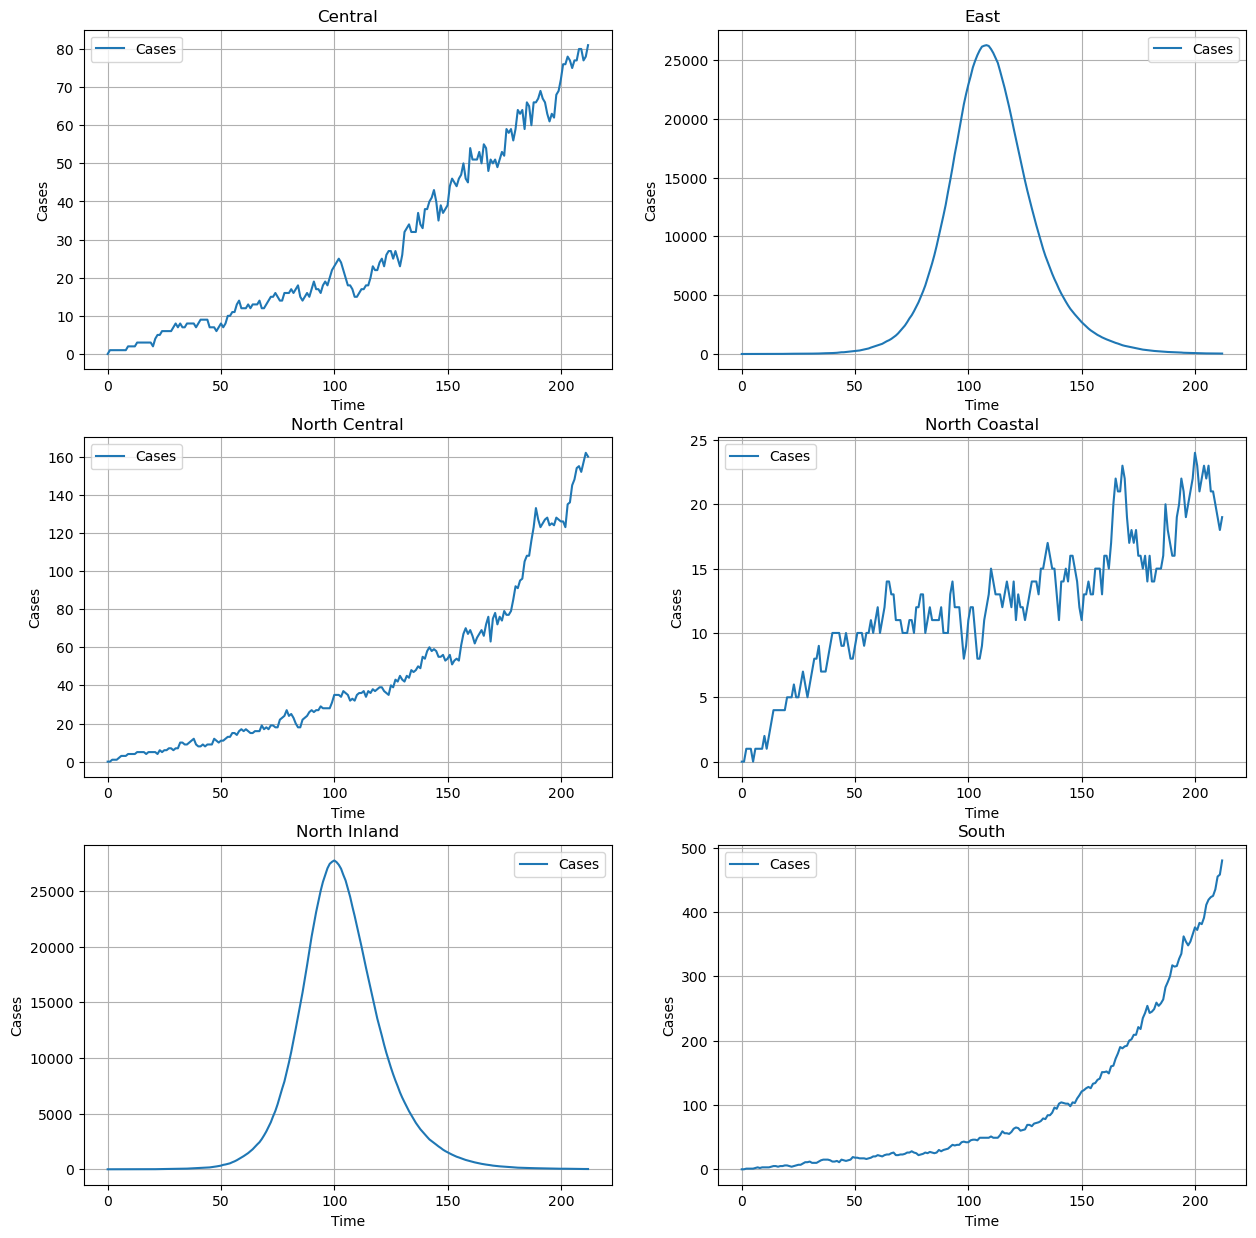

In [30]:
# Plot the simulated cases
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 15)) # create subplot to include every region in one figure

ax1.plot(time[:-2], central_high_v1['I'][central_lsqs_min.index[0]][:-2], label='Cases')
ax1.legend()
ax1.set_title('Central')
ax1.set_xlabel('Time')
ax1.set_ylabel('Cases')
ax1.grid()

ax2.plot(time[:-2], east_high_v1['I'][east_lsqs_min.index[0]][:-2], label='Cases')
ax2.legend()
ax2.set_title('East')
ax2.set_xlabel('Time')
ax2.set_ylabel('Cases')
ax2.grid()

ax3.plot(time[:-2], north_central_high_v1['I'][north_central_lsqs_min.index[0]][:-2], label='Cases')
ax3.legend()
ax3.set_title('North Central')
ax3.set_xlabel('Time')
ax3.set_ylabel('Cases')
ax3.grid()

ax4.plot(time[:-2], north_coastal_high_v1['I'][north_coastal_lsqs_min.index[0]][:-2], label='Cases')
ax4.legend()
ax4.set_title('North Coastal')
ax4.set_xlabel('Time')
ax4.set_ylabel('Cases')
ax4.grid()

ax5.plot(time[:-2], north_inland_high_v1['I'][north_inland_lsqs_min.index[0]][:-2], label='Cases')
ax5.legend()
ax5.set_title('North Inland')
ax5.set_xlabel('Time')
ax5.set_ylabel('Cases')
ax5.grid()

ax6.plot(time[:-2], south_high_v1['I'][south_lsqs_min.index[0]][:-2], label='Cases')
ax6.legend()
ax6.set_title('South')
ax6.set_xlabel('Time')
ax6.set_ylabel('Cases')
ax6.grid()


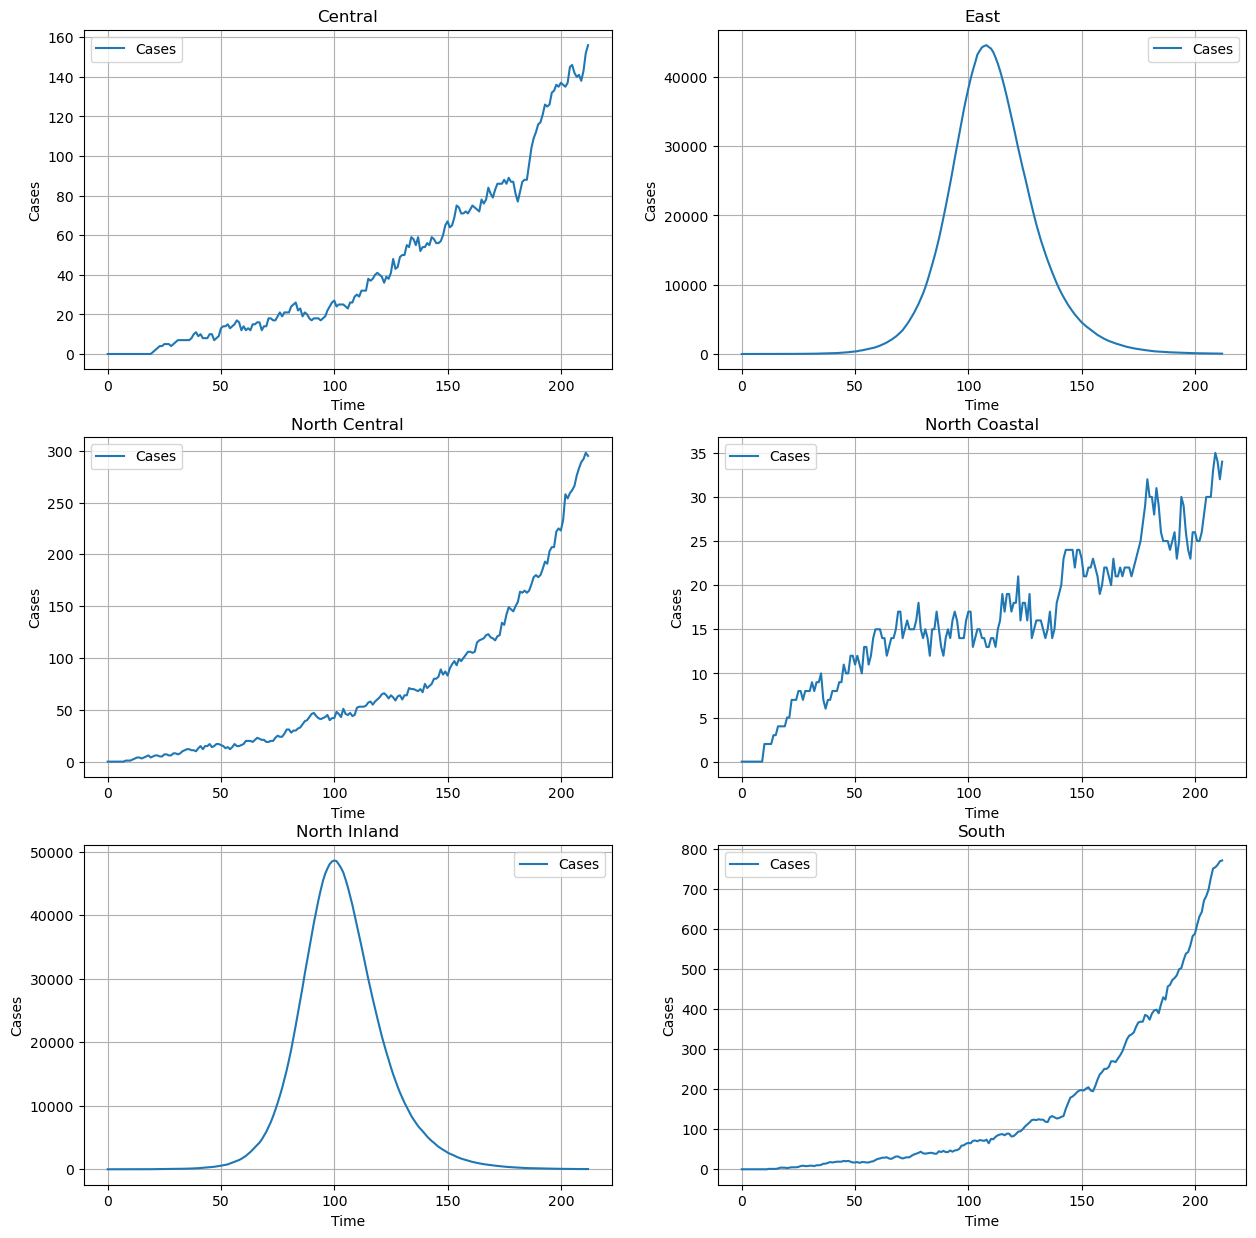

In [31]:
# Plot the simulated cases
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 15)) # create subplot to include every region in one figure

ax1.plot(time[:-2], central_low_v1['I'][central_lsqs_min.index[0]][:-2], label='Cases')
ax1.legend()
ax1.set_title('Central')
ax1.set_xlabel('Time')
ax1.set_ylabel('Cases')
ax1.grid()

ax2.plot(time[:-2], east_low_v1['I'][east_lsqs_min.index[0]][:-2], label='Cases')
ax2.legend()
ax2.set_title('East')
ax2.set_xlabel('Time')
ax2.set_ylabel('Cases')
ax2.grid()

ax3.plot(time[:-2], north_central_low_v1['I'][north_central_lsqs_min.index[0]][:-2], label='Cases')
ax3.legend()
ax3.set_title('North Central')
ax3.set_xlabel('Time')
ax3.set_ylabel('Cases')
ax3.grid()

ax4.plot(time[:-2], north_coastal_low_v1['I'][north_coastal_lsqs_min.index[0]][:-2], label='Cases')
ax4.legend()
ax4.set_title('North Coastal')
ax4.set_xlabel('Time')
ax4.set_ylabel('Cases')
ax4.grid()

ax5.plot(time[:-2], north_inland_low_v1['I'][north_inland_lsqs_min.index[0]][:-2], label='Cases')
ax5.legend()
ax5.set_title('North Inland')
ax5.set_xlabel('Time')
ax5.set_ylabel('Cases')
ax5.grid()

ax6.plot(time[:-2], south_low_v1['I'][south_lsqs_min.index[0]][:-2], label='Cases')
ax6.legend()
ax6.set_title('South')
ax6.set_xlabel('Time')
ax6.set_ylabel('Cases')
ax6.grid()


In [45]:
def plot_total(name, idx, result_1, result_2, lsqrs_min):

    time = pd.DataFrame(np.linspace(0, 214, 215))

    p1 = parameters.loc[parameters['Region'] == name]['Beta Symptomatic'][idx]
    p2 = parameters.loc[parameters['Region'] == name]['Beta Asymptomatic'][idx]

    last = result_1['I'][lsqrs_min.index[0]][:-2] + result_2['I'][lsqrs_min.index[0]][:-2]

    fig = plt.figure(figsize=(10, 6))
    plt.plot(time[:-2], last, label='βsymp={}, βasym={}'.format(p1, p2))
    plt.title('{} Region - Total'.format(name))
    plt.legend(loc='upper left')
    plt.xlabel('Time (days)')
    plt.ylabel('Positive Cases')
    plt.grid()
    plt.show()

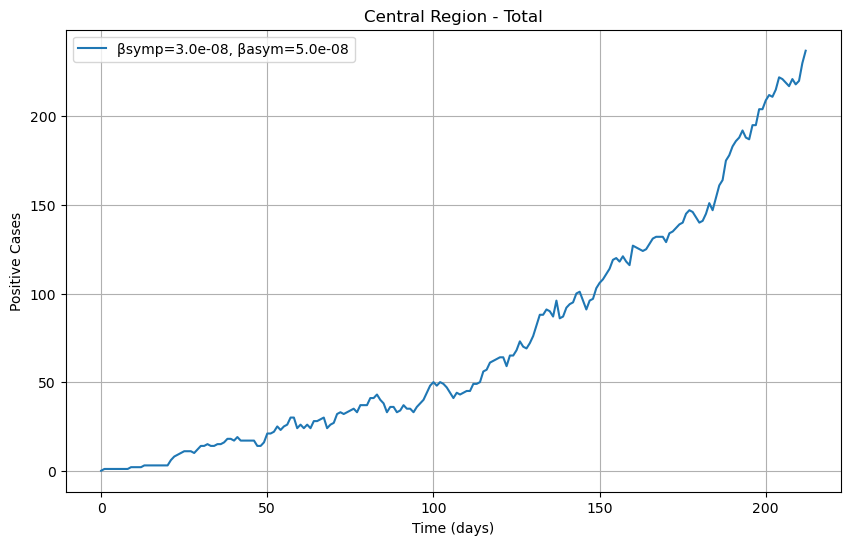

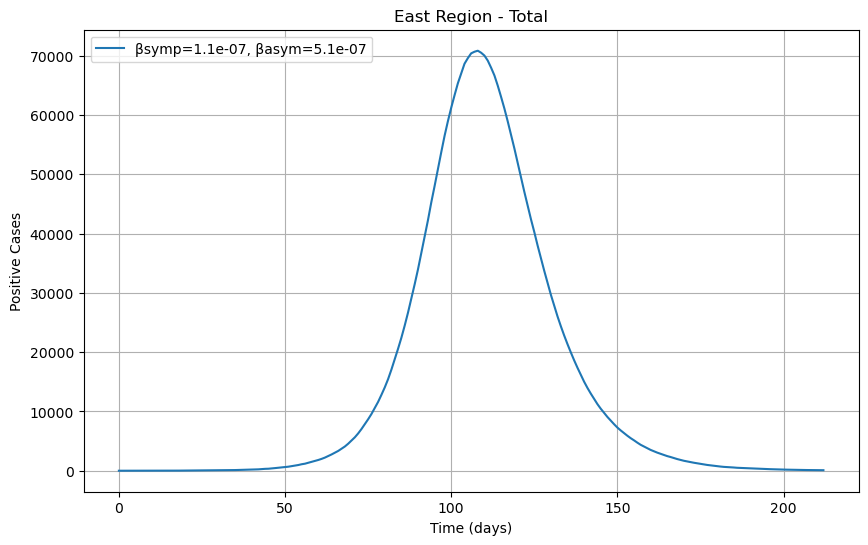

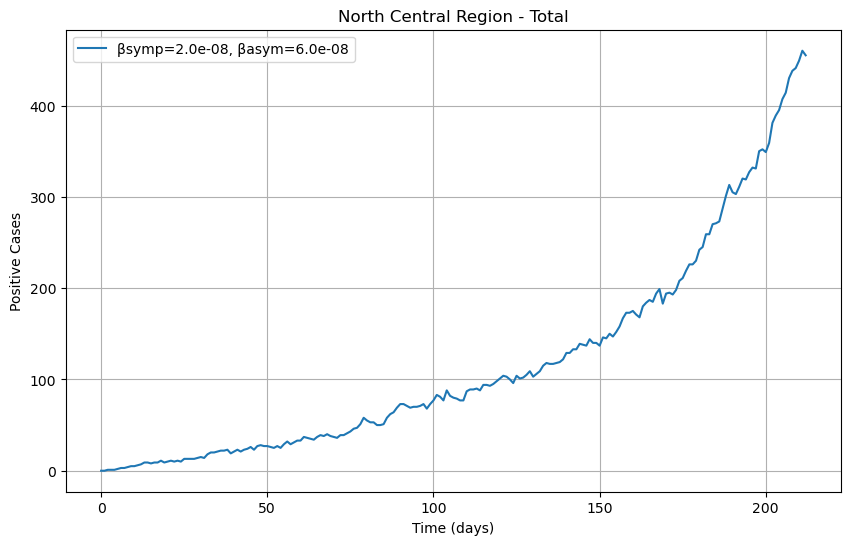

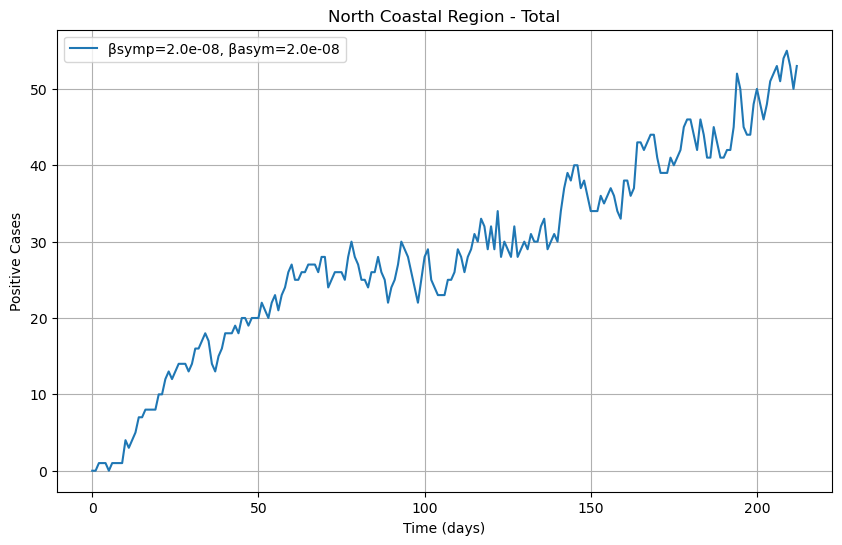

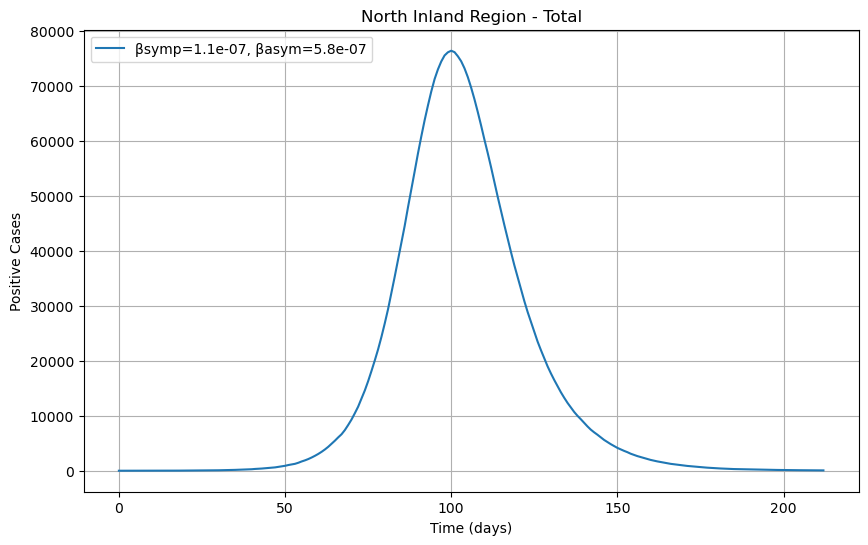

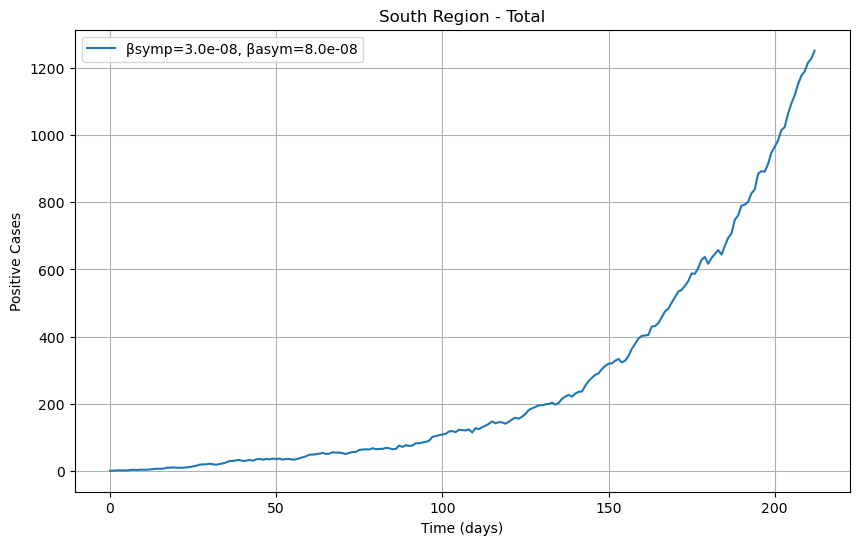

In [47]:
plot_total('Central', 0, central_high_v1, central_low_v1, central_lsqs_min)
plot_total('East', 1, east_high_v1, east_low_v1, east_lsqs_min)
plot_total('North Central', 2, north_central_high_v1, north_central_low_v1, north_central_lsqs_min)
plot_total('North Coastal', 3, north_coastal_high_v1, north_coastal_low_v1, north_coastal_lsqs_min)
plot_total('North Inland', 4, north_inland_high_v1, north_inland_low_v1, north_inland_lsqs_min)
plot_total('South', 5, south_high_v1, south_low_v1, south_lsqs_min)